Loaded Caltech36 subgraph with 762 nodes and 16651 edges.


100%|███████████████████████████████████████| 1000/1000 [03:56<00:00,  4.23it/s]


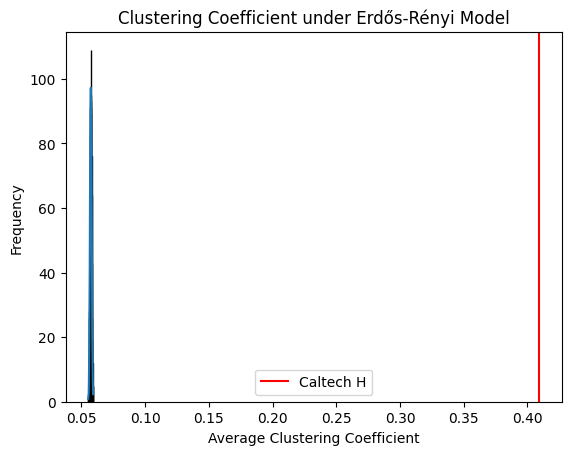

P-value (ER Model): 0.0000


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

# Load Caltech graph
H = nx.read_edgelist("../Data/Caltech36.txt", nodetype=int, delimiter=",")

# Use the largest connected component
if not nx.is_connected(H):
    H = H.subgraph(max(nx.connected_components(H), key=len)).copy()

n = H.number_of_nodes()
m = H.number_of_edges()

print(f"Loaded Caltech36 subgraph with {n} nodes and {m} edges.")

# MLE for Erdős-Rényi: p = 2m / (n(n-1))
p_mle = 2 * m / (n * (n - 1))

# Statistic to compare – clustering coefficient
real_clustering = nx.average_clustering(H)

# Generate 1000 Erdős-Rényi graphs and compute clustering coefficients
er_clustering = []
for _ in tqdm(range(1000)):
    G = nx.erdos_renyi_graph(n, p_mle)
    if nx.is_connected(G):
        c = nx.average_clustering(G)
        er_clustering.append(c)

# Plot and hypothesis test
sns.histplot(er_clustering, kde=True)
plt.axvline(real_clustering, color='red', label='Caltech H')
plt.title("Clustering Coefficient under Erdős-Rényi Model")
plt.xlabel("Average Clustering Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# p-value
p_val_er = np.mean(np.array(er_clustering) >= real_clustering)
print(f"P-value (ER Model): {p_val_er:.4f}")

100%|███████████████████████████████████████| 1000/1000 [04:23<00:00,  3.80it/s]


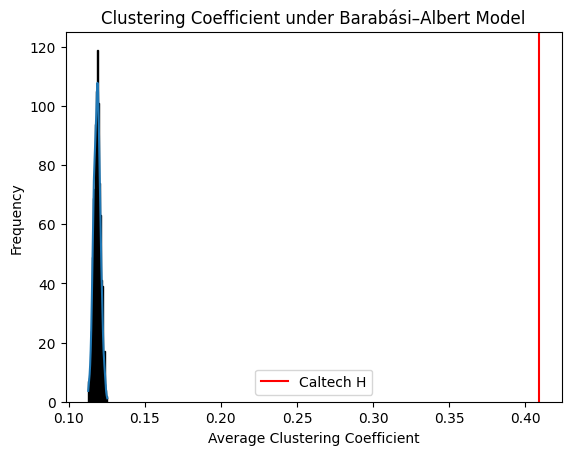

P-value (BA Model): 0.0000


In [6]:
# Estimate parameter m for BA model: m ≈ total edges / total nodes
m_ba = m // n

# Generate 1000 BA graphs and compute clustering coefficients
ba_clustering = []
for _ in tqdm(range(1000)):
    G = nx.barabasi_albert_graph(n, m_ba)
    if nx.is_connected(G):
        c = nx.average_clustering(G)
        ba_clustering.append(c)

# Plot and hypothesis test
sns.histplot(ba_clustering, kde=True)
plt.axvline(real_clustering, color='red', label='Caltech H')
plt.title("Clustering Coefficient under Barabási–Albert Model")
plt.xlabel("Average Clustering Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# p-value
p_val_ba = np.mean(np.array(ba_clustering) >= real_clustering)
print(f"P-value (BA Model): {p_val_ba:.4f}")

In [ ]:
def p_value(x0, data_list):
    # computes p-value = P(random data point from data distribution > x0)
    excess_list = [x for x in data_list if x>=x0]
    return len(excess_list)/len(data_list)

## Load Caltech Facebook graph

# Initialize graph 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 
    
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("Avg. clustering coefficient:", nx.average_clustering(G0))
print("Avg. shortest path length:", nx.average_shortest_path_length(G0))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

# Compute the number of connected compoenents
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

nx.draw(G0)

Number of nodes: 769
Number of edges: 16656


NameError: name 'G0' is not defined

In [ ]:
# Perform a random walk and take an induced subgraph on a random walk trajectory 
RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

In [ ]:
fig = plt.figure(figsize=[10,4], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.3, hspace=0.1)

degrees = [H.degree(v) for v in H.nodes()]
G = CM(d=degrees)

inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
nx.draw(H, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Caltech Subgraph", fontsize=10)

inner_grid = outer_grid[0,1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Configuration Model", fontsize=10)

plt.savefig("CM_3", bbox_inches="tight")

In [ ]:
from tqdm import trange

n_samples = 1000

statistics_list = ["avg. deg.", "avg. clustering coeff.", "avg. path length", "max matching"]

stats_list0 = []
stats_list1 = [] 
stats_list2 = []
stats_list3 = []

degrees = [H.degree(v) for v in H.nodes()]

for i in trange(n_samples): 
    G = CM(d = degrees)
    
    # convert multigraph G into a simple graph G00 
    G00 = nx.Graph()
    for e in G.edges():    
        G00.add_edge(e[0],e[1])
    G0 = G00
    
    avg_deg = np.mean(np.asarray([G.degree(v) for v in G.nodes()]))
    stats_list0.append(avg_deg)
    stats_list1.append(nx.average_clustering(G00))
    if nx.is_connected(G):
        stats_list2.append(nx.average_shortest_path_length(G))
    else:
        stats_list2.append(0)
        
    stats_list3.append(len(nx.maximal_matching(G00)))  

stats_list_all = [stats_list0, stats_list1, stats_list2, stats_list3]

In [ ]:
fig = plt.figure(figsize=[11,2], constrained_layout=False)

test_0 = np.mean(np.asarray(degrees))
test_1 = nx.average_clustering(H)
test_2 = nx.average_shortest_path_length(H)
test_3 = len(nx.maximal_matching(H))

outer_grid = gridspec.GridSpec(nrows=1, ncols=len(statistics_list), wspace=0.2, hspace=0.3)

for i in np.arange(len(statistics_list)): 
    if i == 0:
        test_0 = np.mean(np.asarray(degrees))
    elif i == 1:
        test_0 = nx.average_clustering(H)
    elif i == 2:
        test_0 = nx.average_shortest_path_length(H)
    elif i == 3:
        test_0 = len(nx.maximal_matching(H))
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid[0, 0])
    p0 = p_value(test_0, stats_list_all[i])
    ax.hist(stats_list_all[i], bins='auto', alpha=0.7, label="CM", edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(statistics_list[i], fontsize=8)
    ax.axvline(x=test_0, color='r', label=r"$p$-value={}".format(p0))
    ax.legend(fontsize=9)

plt.suptitle("Hypothesis testing for a sugraph of Caltech FB graph", y=1.1)
plt.savefig("CM_hypothesis0", bbox_inches="tight")